In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as ms

plt.style.use('dark_background')

# `Análisis Visual de datos - Segmentación de clientes de un Banco`

**Grupo _ - Integrantes:**

**Weimar CCapatinta Huamani**

# `1. DEFINICIÓN DEL PROBLEMA`

Para la empresa segmentar a sus clientes qu utilizan sus tarjetas de crédito le permitirá definir canales de comunicación específicos, coherentes y efectivos para cada grupo de usuarios. De esa manera será mucho más sencillo mantener una interacción constante y saludable con los diferentes segmentos,

# `2. DESCRIPCIÓN DEL DATASET`

| `Varaible` | `Descripción de la variable` |
|----------|-------------------------------|
| CUST_ID | Identificación del titular |
| BALANCE | Cantidad de saldo que queda en la cuenta del cliente para hacer compras |
| BALANCE_FREQUENCY | Frecuencia de actualización del saldo 1: actualizado con frecuencia, 0: no actualizado con frecuencia |
| PURCHASES | Cantidad de compras realizadas desde la cuenta |
| ONEOFF_PURCHASES | Importe máximo de compra realizado en una sola vez |
| INSTALLMENTS_PURCHASES | Importe de compra realizada en cuotas |
| CASH_ADVANCE | Anticipo otorgado al usuario |
| PURCHASES_FREQUENCY | Frecuencia con la que se realiza las compras 1: comrpas frecuentes 0: compras no frecuentes|
| ONEOFF_PURCHASES_FREQUENCY | con que frecuencialas compras se realizan de una sola vez 1: confrecuencia 0. no compra con frecuencia|
| PURCHASES_INSTALLMENTS_FREQUENCY | Con que frecuencia se realizan las compras a plazos 1: con frecuencia 0: sin frecuencia|
| CASH_ADVANCE_FREQUENCY | con que frecuencia el gasto se paga por adelantado |
| CASH_ADVANCE_TRX | Numero de transacciones realizadas con efectivo por adelantado |
| PURCHASES_TRX | numero de transacciones de compras realizadas |
| CREDIT_LIMIT | Límite de tarjeta de crédito para el usuario |
| PAYMENTS | Número de pagos realizados por el usuario |
| MINIMUM_PAYMENTS | Cantidad minima de pagos realizados por el usuario |
| PRC_FULL_PAYMENT | porcentje delpago total pagado por el usuario |
| TENURE | Años que el cliente viene usando el servicio de tarjeta de crédito |

In [2]:
data = pd.read_csv('data/data.csv')
print('El dataset cuenta con :\n', data.shape[0],' Filas y \n ',data.shape[1], ' Columnas')
data.head(2)

El dataset cuenta con :
 8950  Filas y 
  18  Columnas


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


## `Selección de variables relevantes`

Seleccionamos las siguientes variables:
- CUST_ID: VARIABLE QUE NO APORTA VALOR


In [3]:
Eliminar = 'CUST_ID' # VARIABLE QUE NO APORTA VALOR
#target = 'Loan_Status' # VARIABLE TARGET

Eliminar variables que no aportan información relevante y crear el parametro target = CUST_ID

In [5]:
data.drop(Eliminar,axis=1,inplace=True)

# `3. ANÁLISIS EXPLORATORIO`

Dividimos el Dataset en un dataset de variables numéricas (data_num) y un set de variables categóricas (data_cate)

In [7]:
data_cate = data.select_dtypes('object')
data_num = data.select_dtypes('number')
print('El dataset data_cate cuenta con :\n', data_cate.shape[0],' Filas y \n ',data_cate.shape[1], ' Columnas\n')
print('El dataset data_num cuenta con :\n', data_num.shape[0],' Filas y \n ',data_num.shape[1], ' Columnas')

El dataset data_cate cuenta con :
 8950  Filas y 
  0  Columnas

El dataset data_num cuenta con :
 8950  Filas y 
  17  Columnas


## `3.1 Variables Numericas`

In [8]:
data_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Veamos los principales estadísticos:

In [9]:
data_num.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- la diferencia que exista entre la media (mean) y la mediana (50%) indicara que existe outlayers 
- Existe amplia diferencia entre los clientes que tienen saldos disponible donde el minimo es 0 y el máximo es 19043
- Tambien se puede apreciar la presencia de valores nulos en las variables (CREDIT_LIMIT		MINIMUM_PAYMENTS)

In [17]:
# Vamos a ver quien pago por anticipado $47137!
# hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

data[data['CASH_ADVANCE'] == 47137.211760]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


Ejemplo:
- pago por anticipado $47137
- total transacciones por adelantado 123
- Nunca paga sus compras completamente con la tarjeta

Los tipos de datos se muestran a continuación:

In [10]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### Gráfica de barras

En las siguientes gráficas se puede apreciar la asimetrtia a la derecha de las variables (ApplicantIncome	CoapplicantIncome	LoanAmount	)

A continuación se grafica las frecuencias y densidad por variable

C:\Users\wmr_w\AppData\Local\Temp\ipykernel_15064\1706269088.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[data_num.columns[i]], kde_kws = {"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "w"})
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_15064\1706269088.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

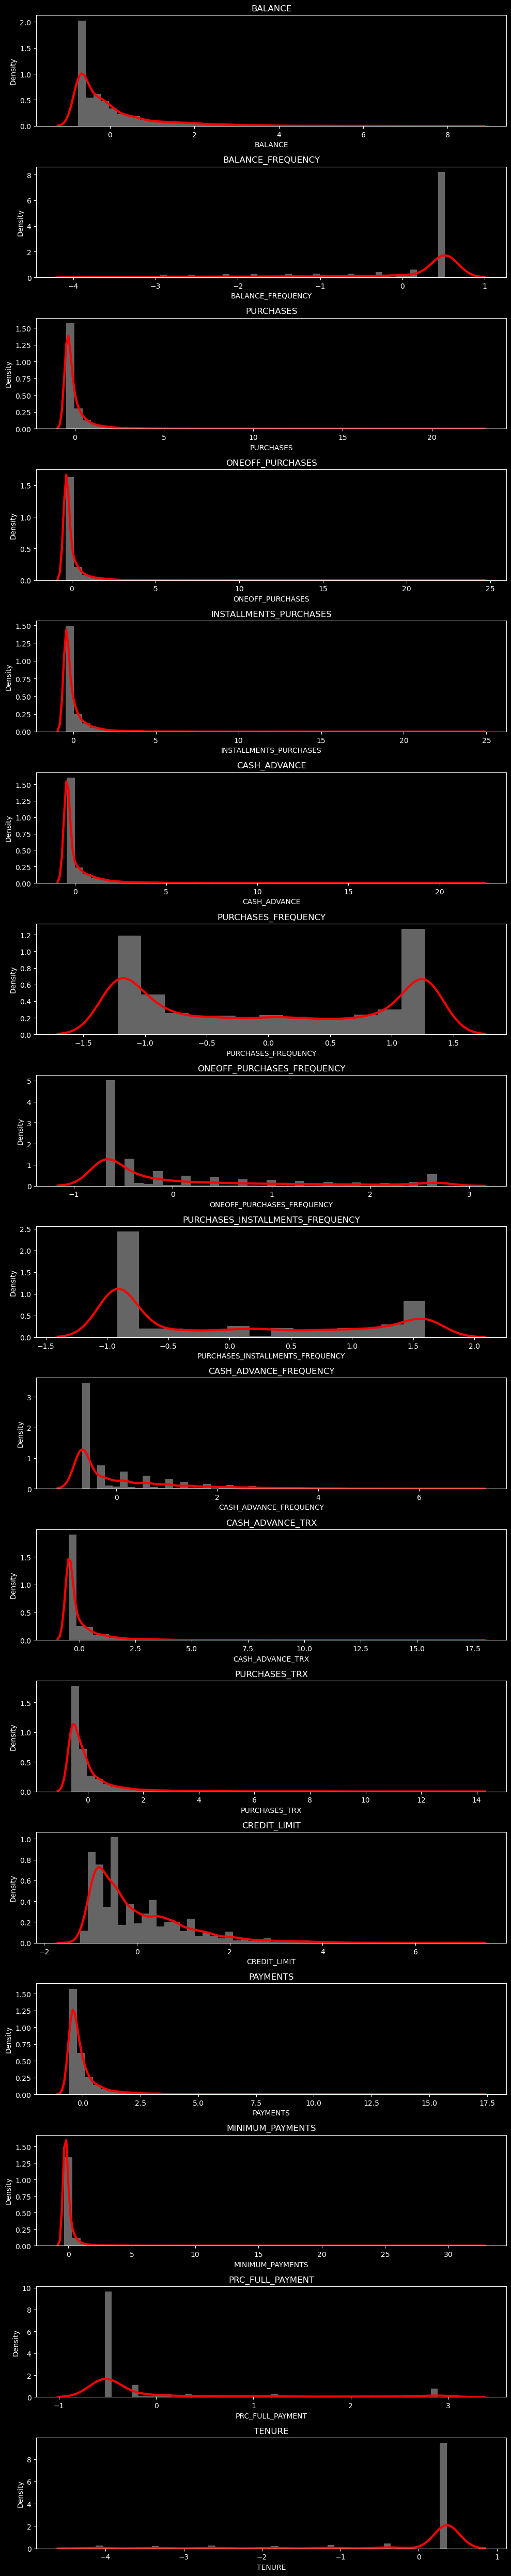

In [34]:
n = len(data_num.columns)

plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(data_num[data_num.columns[i]], kde_kws = {"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "w"})
    plt.title(data_num.columns[i])

plt.tight_layout()

In [ ]:
# plt.figure(figsize = (10, 50))
# for i in range(len(data_num.columns)):
#     plt.subplot(len(data_num.columns), 1, i+1)
#     sns.distplot(data_num[data_num.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
#     plt.title(data_num.columns[i])

# plt.tight_layout()

### Diagrama de caja

A continuación el diagram de caja por variable y estado de préstamo

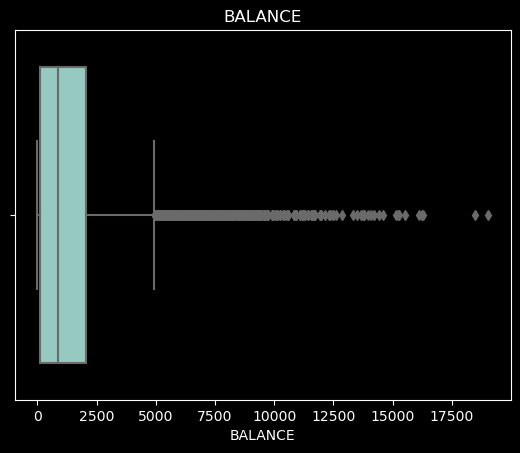

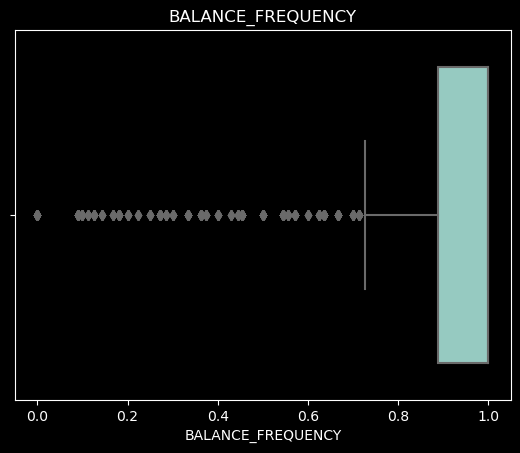

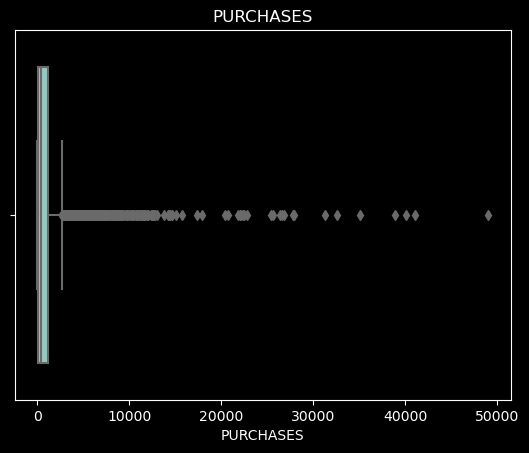

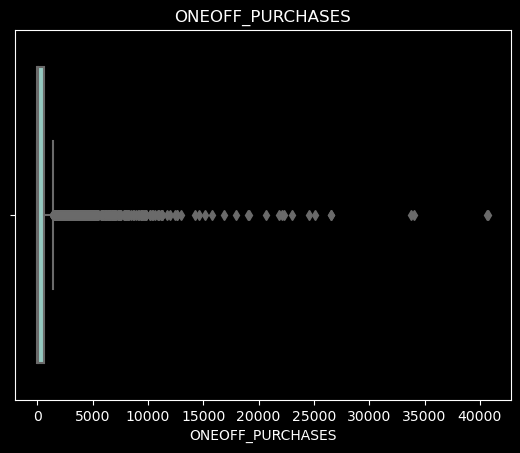

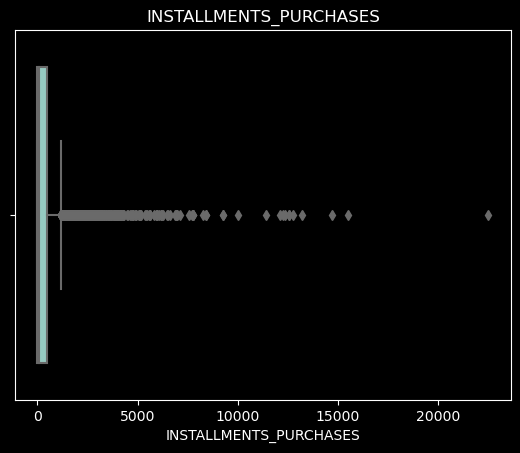

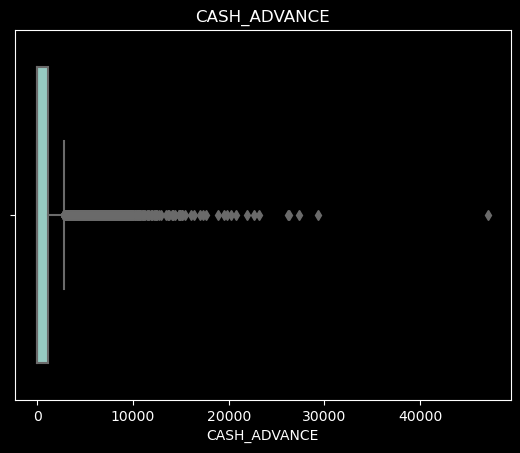

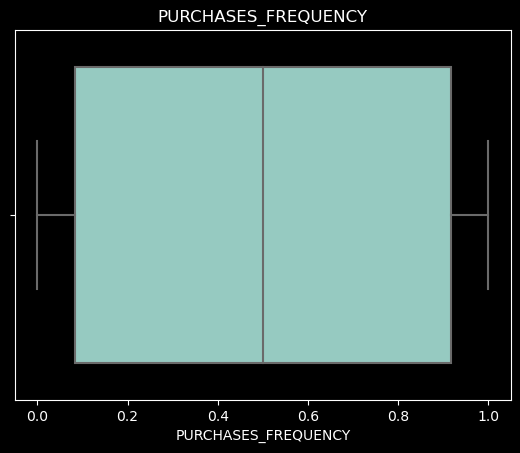

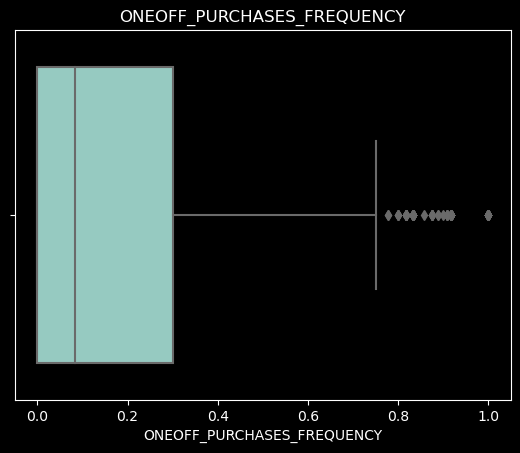

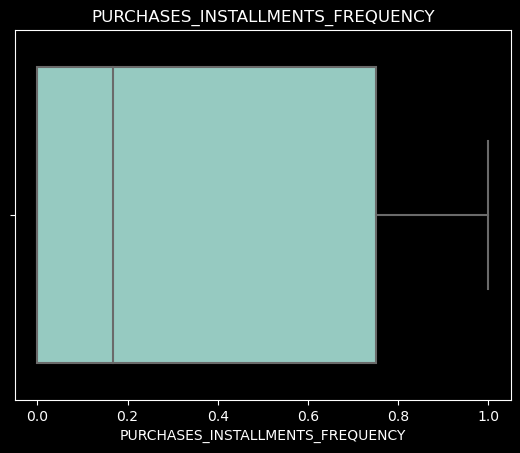

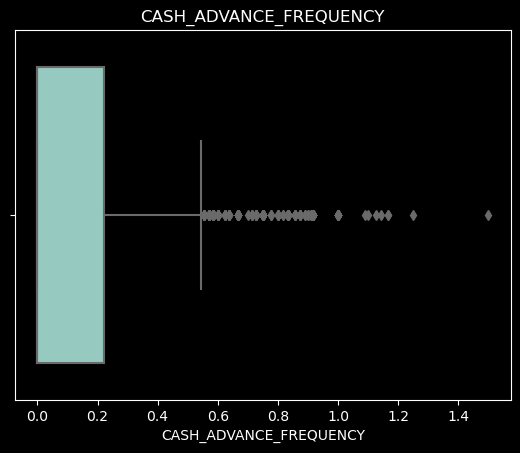

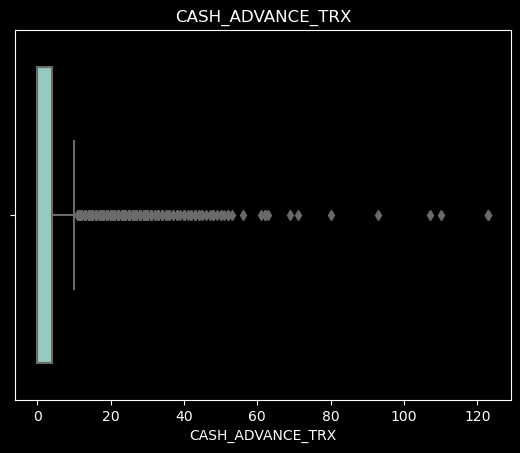

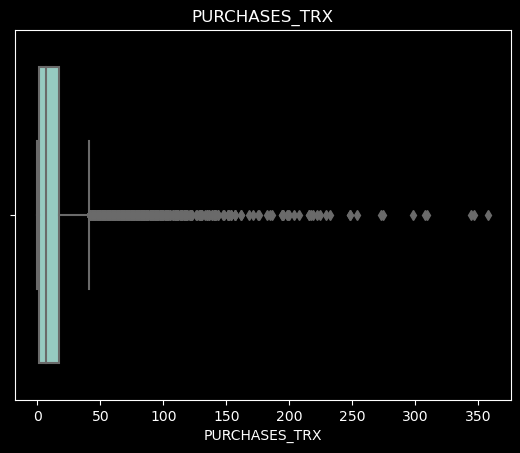

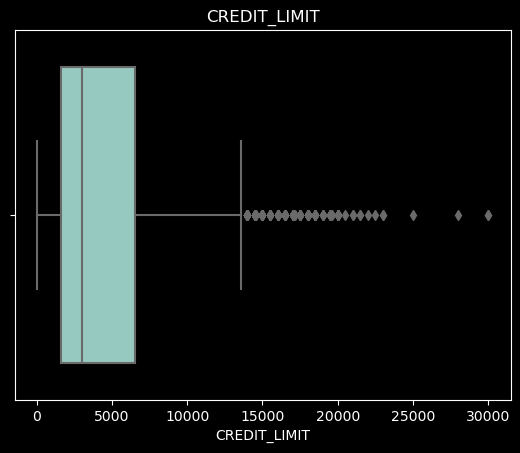

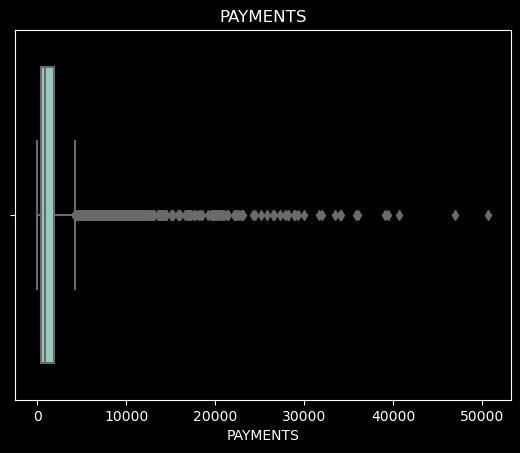

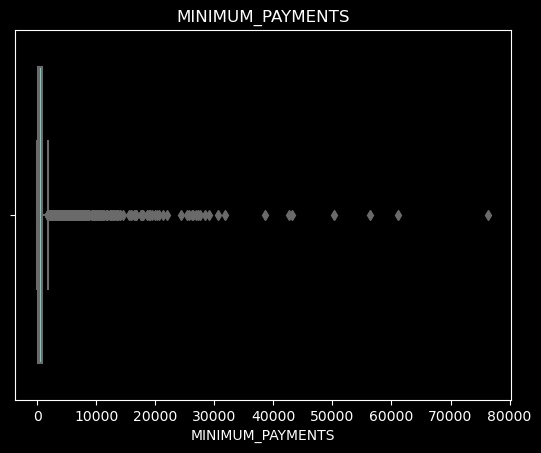

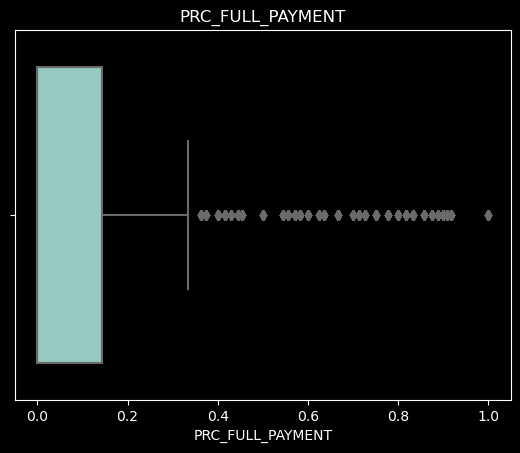

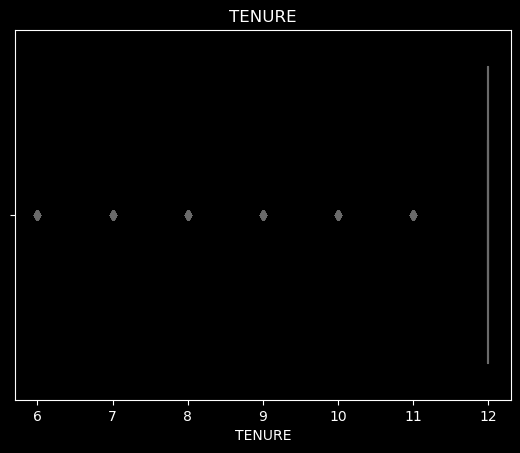

In [13]:
for x in data_num.columns:
  plt.title(data_num[x].name)
  sns.boxplot(x=data_num[x])
  plt.show()

### Valores nulos

Identificamos los valores nulos

In [14]:
data_num.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

De manera visual:

<Axes: >

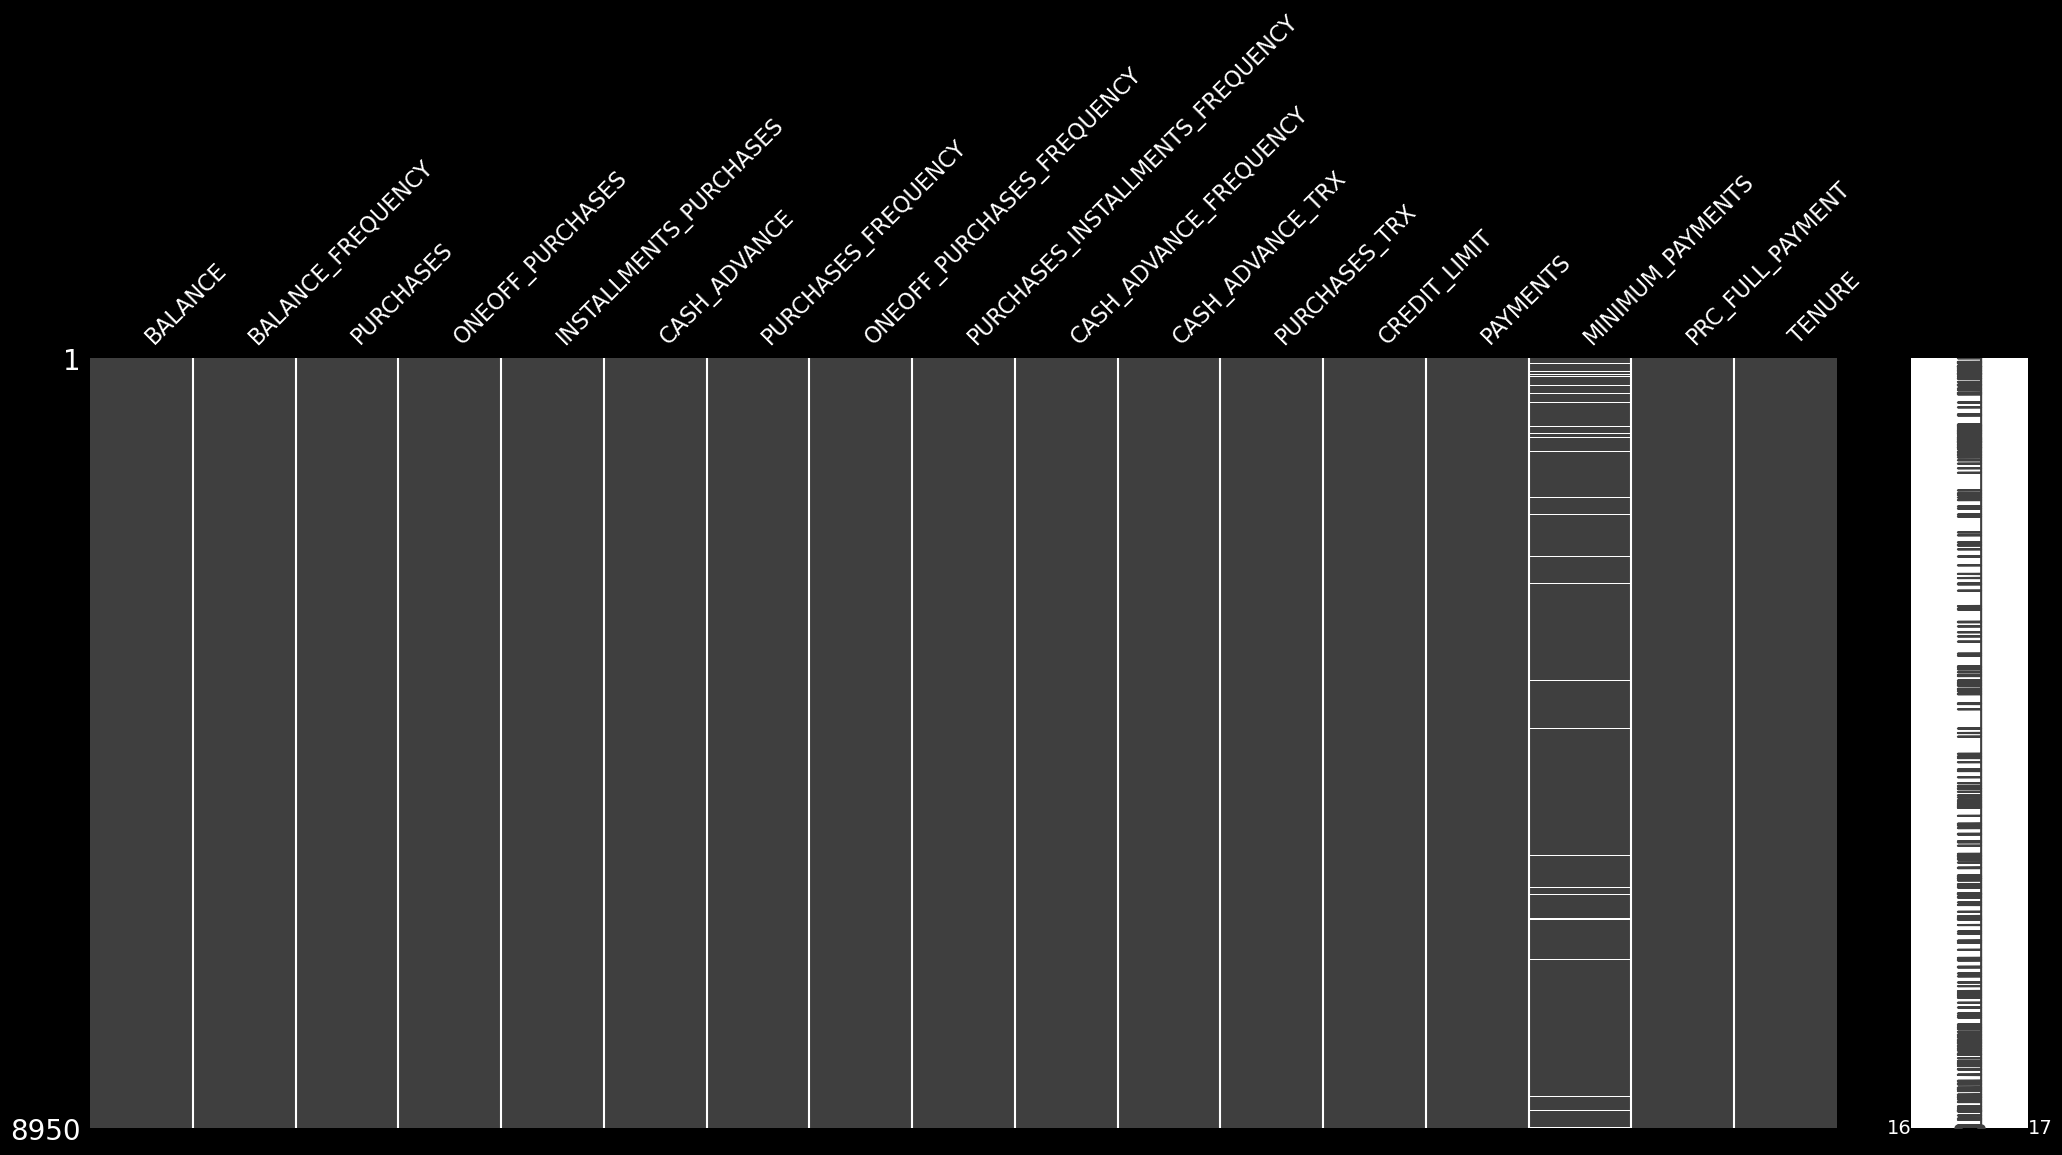

In [15]:
ms.matrix(data_num)

Utilizamos la mediana para la imputación de las variables numéricas

In [18]:
# Imputación de las variables cuantitativas usando la mediana

for i in ('CREDIT_LIMIT','MINIMUM_PAYMENTS'):
  data_num[i].fillna(data_num[i].median(), inplace = True)

In [19]:
data_num.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Estandarizacion de variables numericas.

In [20]:
data_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


A:

In [21]:
#data_num2 = data_num

In [23]:
import scipy.stats as st
for i in data_num.columns:
  data_num[i]=st.zscore(data_num[i])
data_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## `3.2 Variables Categoricas `

Veamos los principales estadísticos para variables categoricas:

In [135]:
data_cate.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [136]:
data_cate.describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Registros unicos

In [137]:
data_cate.nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

### Gráficas

Diagrama por variable y estado de préstamo

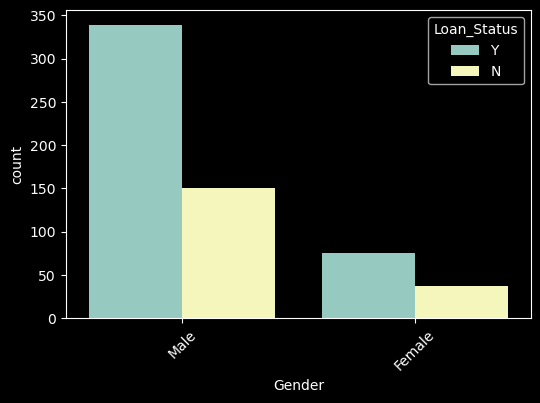

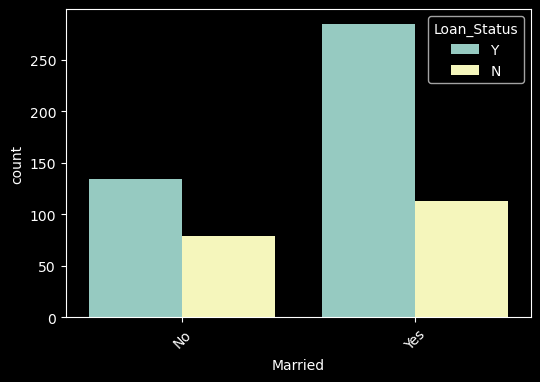

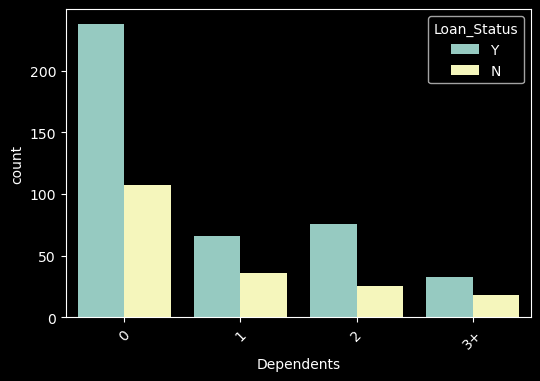

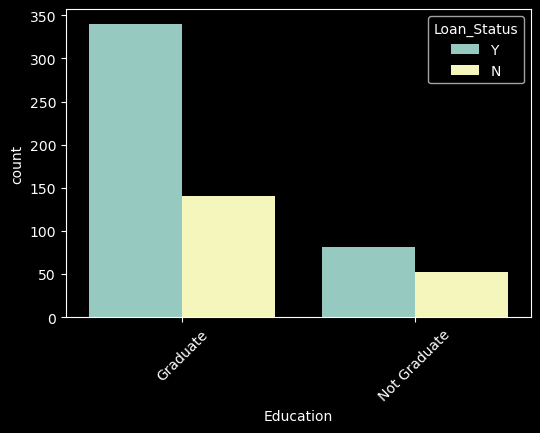

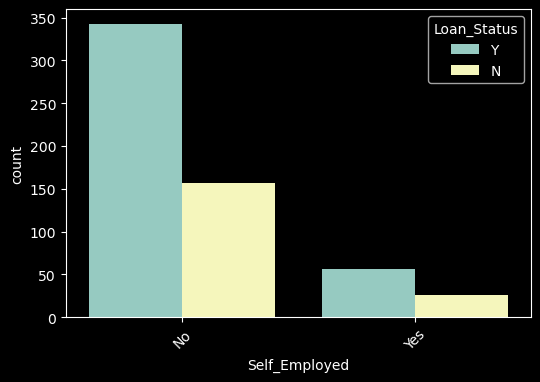

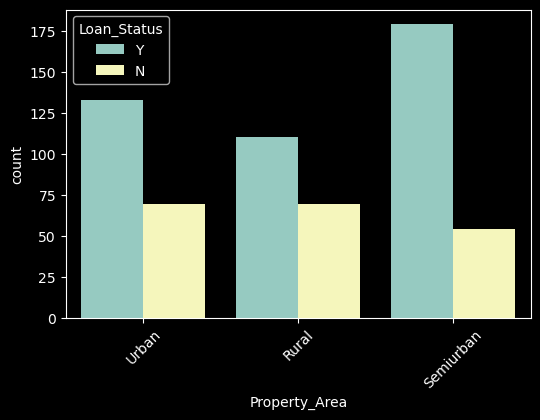

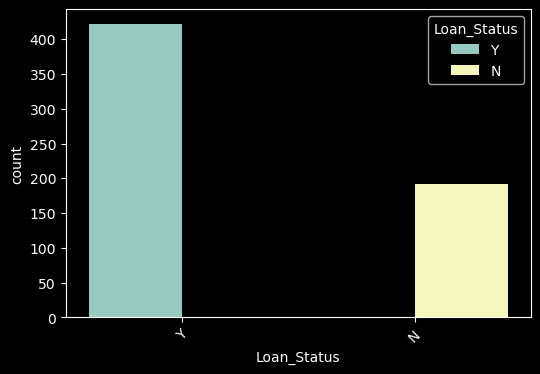

In [139]:
for i in data_cate:
    plt.figure(figsize=(6,4))
    plt.xticks(rotation=45)
    g = sns.countplot(x = data_cate[i], data = data, hue=target)
    #g.set_xticklabels(rotation=30)
    plt.show()

Personas de sexo masculino, casados, sin hijos y graduados, son caracteristicas de clientes que fueron aceptadas sus préstamos hipotecarios.

### Valores nulos

In [149]:
data_cate.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

Manera visual:

<Axes: >

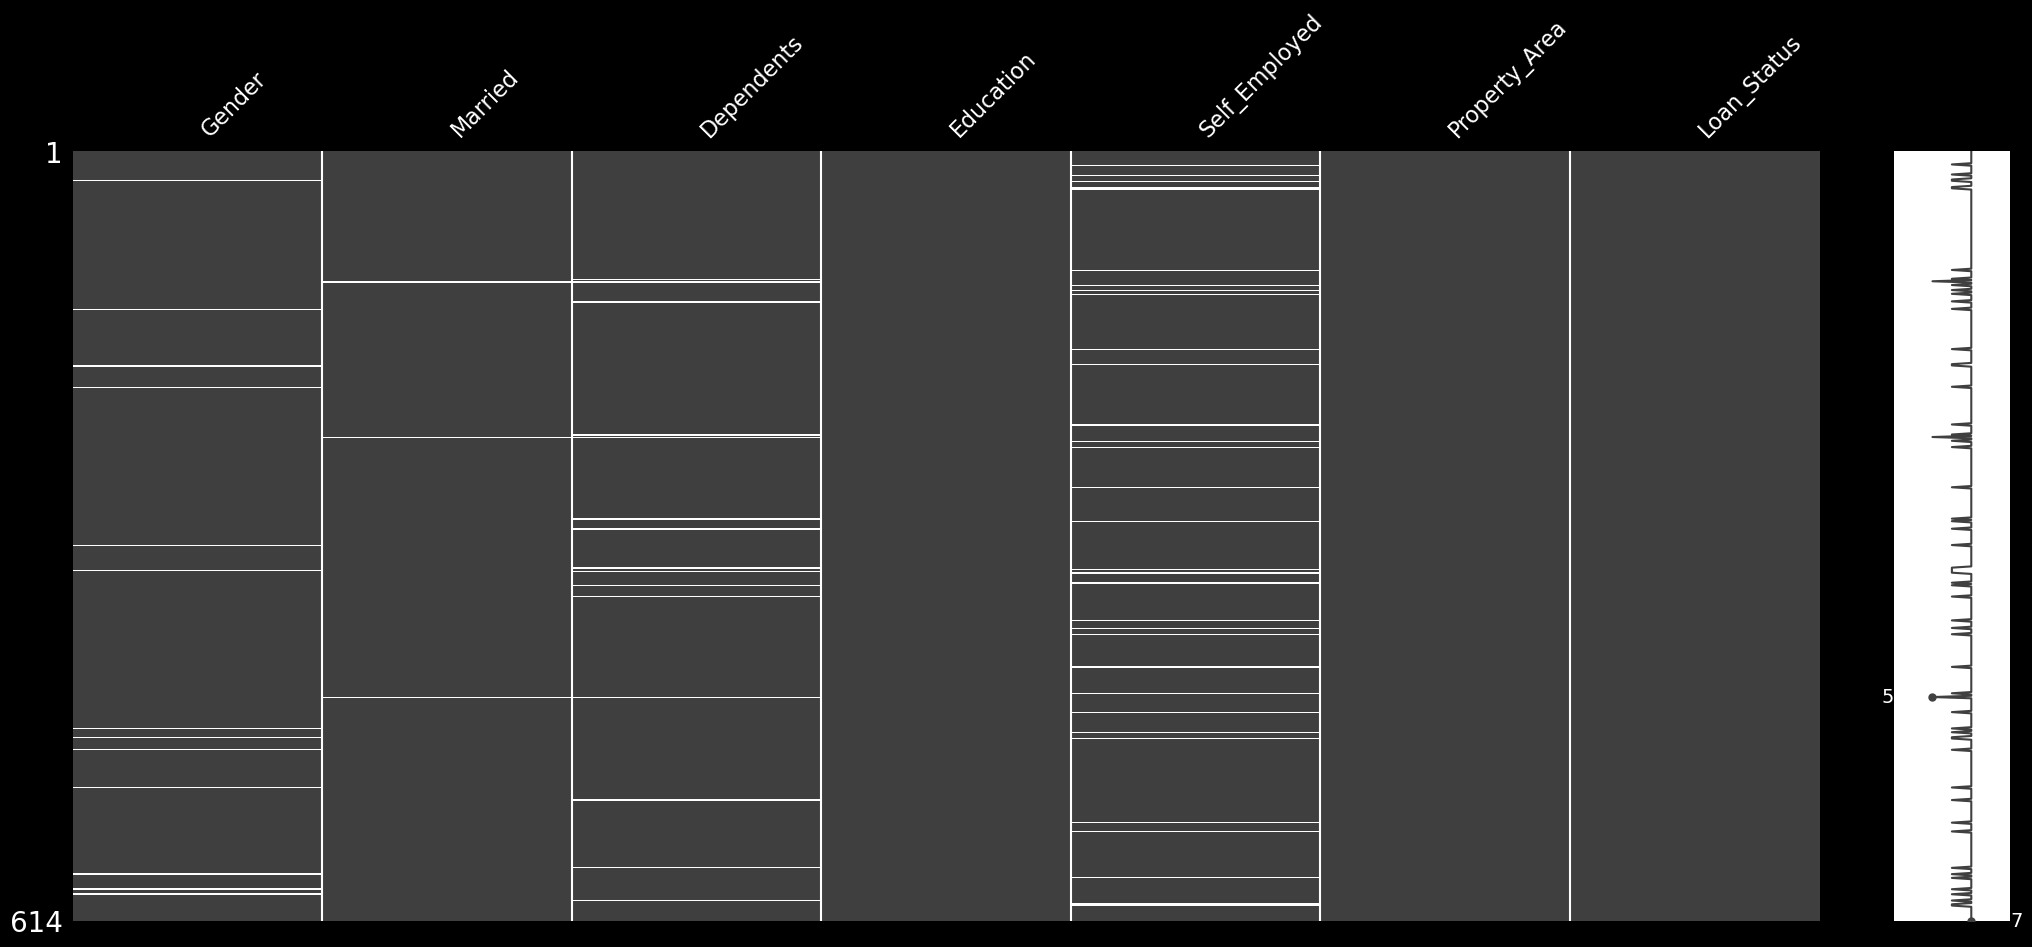

In [153]:
ms.matrix(data_cate)

Imputamos las varaibles catergóricas con la moda

In [157]:
# Imputación de las variables cualitativas usando la moda

for i in ('Gender','Married','Dependents','Self_Employed'):
  data_cate[i].fillna(data_cate[i].mode()[0], inplace = True)

data_cate.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

Transformación de variables: renombramos el valor 3+ a "3" ya que hace referencia a más de 3 hijos

In [159]:
mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
data_cate['Dependents'] = data_cate['Dependents'].map(mapping)

In [161]:
data_cate.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

Encoding de variables categoricas, para un rapido procesamiento convertimos las variables categoricas en valores numéricos

In [169]:
data_cate = pd.get_dummies(data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]], drop_first=True)
data_cate.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,1,1
1,1,1,0,0,0,0,0
2,1,1,0,1,0,1,1
3,1,1,1,0,0,1,1
4,1,0,0,0,0,1,1


## 4.3 Análisis multivariable

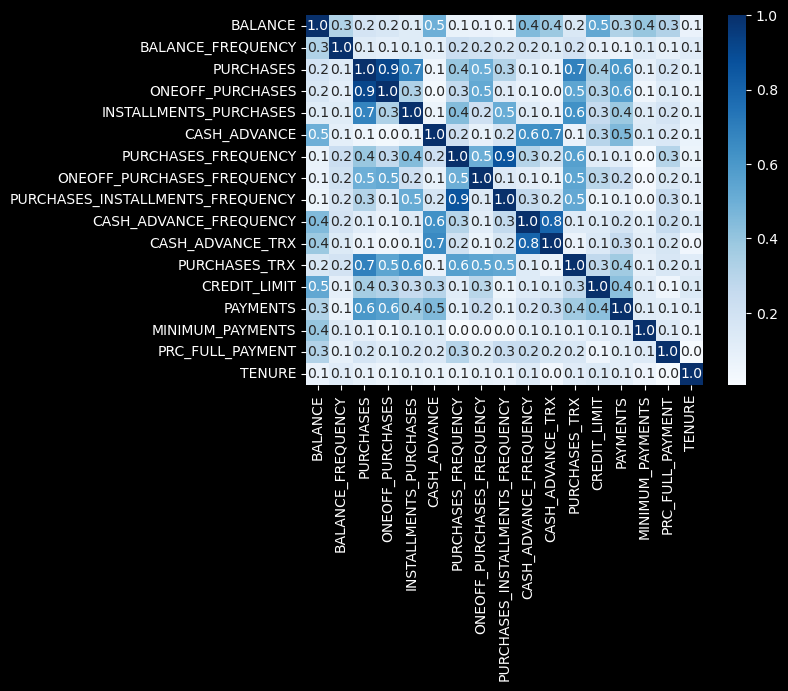

In [25]:
# Analizamos la correlación de las variables. 
sns.heatmap(abs(data_num.corr()), annot=True, fmt='.1f', cmap='Blues')
plt.show()

Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' también entre  'PURCHASES' y 'ONEOFF_PURCHASES'

Exportamos la data preprocesada.

        data_num.to_csv('Data_procsada.csv', index=False)

In [186]:
data_num.to_csv('Data_procsada.csv', index=False)

In [35]:
data_num.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')